In [1]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)
pip 20.2.4 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_train_all = x_train_all / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [8]:
print(np.max(x_train), np.min(x_train))

1.0 0.0


In [14]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [9]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105137


In [10]:
# tf.keras.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3]
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[]
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [11]:
history = model.fit(x_train_scaled, y_train, epochs=10, 
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5380 - accuracy: 0.8092 - val_loss: 0.4064 - val_accuracy: 0.8578
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3929 - accuracy: 0.8581 - val_loss: 0.4281 - val_accuracy: 0.8420
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3526 - accuracy: 0.8735 - val_loss: 0.3435 - val_accuracy: 0.8756
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3275 - accuracy: 0.8818 - val_loss: 0.3480 - val_accuracy: 0.8762
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3090 - accuracy: 0.8876 - val_loss: 0.3282 - val_accuracy: 0.8838
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2924 - accuracy: 0.8929 - val_loss: 0.3185 - val_accuracy: 0.8870
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2787 - accuracy: 0.8987 - val_loss: 0.3135 - val_accuracy:

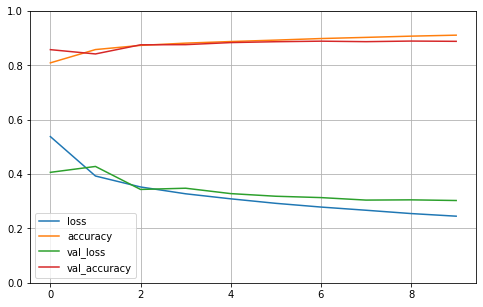

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [15]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8758


[0.33777672052383423, 0.8758000135421753]